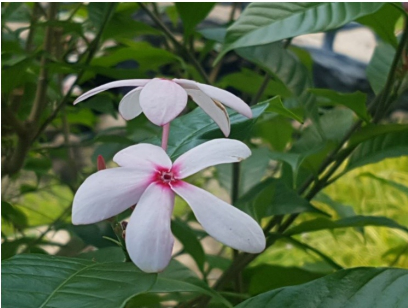

In [4]:
from PIL import Image
from glob import glob

imgList = glob("../데이터_분석을_위한_파이썬/img/*.jpg")
img = Image.open(imgList[0])
img

In [5]:
# array로 변환하는 것을 추천~
import numpy as np
img = np.array(img)

# img -> 숫자로 된 array 나옴

# type이 array는 변수.shape가 가능
# type이 list는 np.shape(변수명)
img.shape, np.shape(img)    # 308개의 행(가로)와 열(세로)이 408로 구성되어 있고 3채널(RGB)을 가지는 이미지.

((308, 408, 3), (308, 408, 3))

In [6]:
tmp = img.reshape((1, 308, 408, 3))   # reshape 할 때 () 안에 reshape할 값을 ()로 넣어줌
tmp.shape   # 1개의 사진은 308row, 408cols, 3chanel(RGB로) 구성됨

(1, 308, 408, 3)

(<matplotlib.image.AxesImage at 0x221982a6410>,
 <matplotlib.image.AxesImage at 0x221982b2e10>)

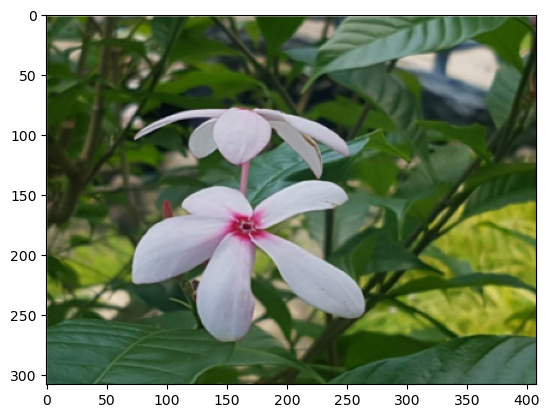

In [7]:
import matplotlib.pyplot as plt
plt.imshow(img), plt.imshow(tmp[0])

tensor는 array 하나를 감싸는

In [8]:
tmp=img[np.newaxis, ...]    # 축을 하나 추가하겠다는 뜻
tmp.shape                   # 1개의 사진은 308rows, 408cols, 3chanel

(1, 308, 408, 3)

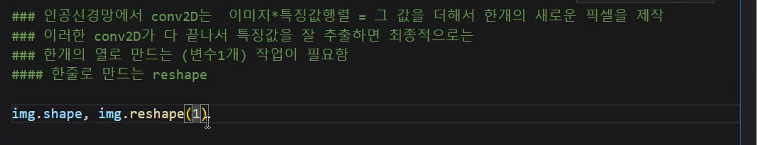


In [9]:

img.shape, img.reshape(-1)

((308, 408, 3), array([255, 255, 255, ...,  75, 113,  98], dtype=uint8))

In [12]:
a = np.zeros((4, 50))
a.reshape(-1)
a.shape


(4, 50)

In [15]:
a=np.zeros((200))
a.reshape(4, -1)
a.shape     # -> (200) 과 (200, )는 다릅니다.

(200,)

In [17]:
a=np.zeros((4, 50))
a = a.flatten()     # a.reshape(-1)과 같음. 인공신경망에서 많이 보인다. 평평하게=> 한 줄로 만들어줌.
print(a)
a.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


(200,)

In [18]:
###########################
######
###########################

a=np.array([1,2,3,4])
b = [[1],
     [2],
     [3],
     [4]]
c=[[1,2,3,4]]

print(np.shape(a), np.shape(b), np.shape(c))
print(a[0], b[0], c[0])

print(a[3], b[3][0], c[0][3])       # 

(4,) (4, 1) (1, 4)
1 [1] [1, 2, 3, 4]
4 4 4


### 오후 numpy

#### 작업1) 자료 입력하고 제목과 자료 분리

In [19]:
신규회원 = [['지점', '1월', '2월', '3월'],
        ['A',1,2,5],
        ['B',3,4,1],
        ['C',4,1,1]]
header = 신규회원[0]
data = 신규회원[1:]
data

[['A', 1, 2, 5], ['B', 3, 4, 1], ['C', 4, 1, 1]]

### 작업2) 작업하기 편리하게 인원수만 분리함

In [20]:
import numpy as np
data = np.array(data)
인원수 = data[:,1:].astype(np.uint8)
인원수

array([[1, 2, 5],
       [3, 4, 1],
       [4, 1, 1]], dtype=uint8)

### 작업3) 인원수 자료 중 1월에만 100을 더하고자 함. Numpy 자료임으로 '브로드 캐스트' 가능함
- 브로드캐스트 : 행, 열 단위로 한번에 작업하는 기능을 의미. 넘파이 자료만 브로드캐스트 가능함

In [21]:
########################################
### 1월에만 +100을 더하고자 할 때
########################################

인원수[:,0]+=100 
인원수

array([[101,   2,   5],
       [103,   4,   1],
       [104,   1,   1]], dtype=uint8)

### 작업4) 2월 자료에만 *2.3을 하고자 함. dtype 변경을 하지 않으면 정수 자료임으로 정수만 출력됨

In [22]:
##################################
#   2월에만 *2.3을 하고자 할 때
#   dtype이 int라 소수점 이하 절사됨
##################################

인원수[:,1] = 인원수[:,1]*2.3
print(인원수)

인원수=인원수.astype(np.float32)
인원수[:,1] = 인원수[:,1]*2.5   # 숫자가 넘 더러워서 2.5로 바꿈
인원수

[[101   4   5]
 [103   9   1]
 [104   2   1]]


array([[101. ,  10. ,   5. ],
       [103. ,  22.5,   1. ],
       [104. ,   5. ,   1. ]], dtype=float32)

### 작업5) C 지점에만 전체 -100을 하고자 할 때

In [23]:
##################################
#   C 지점에만 전체 -100을 학좌 할 때
#################################
인원수[2, :]=인원수[2, :]-100
인원수

array([[101. ,  10. ,   5. ],
       [103. ,  22.5,   1. ],
       [  4. , -95. , -99. ]], dtype=float32)

### 작업6) 인덱싱 마무리

In [24]:
##############################
# B지점의 3월 자료를 100으로 변경하고자 할 때
##############################

인원수[1,2] = 100
인원수

array([[101. ,  10. ,   5. ],
       [103. ,  22.5, 100. ],
       [  4. , -95. , -99. ]], dtype=float32)

In [25]:
#############################
# 2월 자료를 모두 50으로 변경하고자 할 때
#############################

인원수[:, 1] = 50
인원수

array([[101.,  50.,   5.],
       [103.,  50., 100.],
       [  4.,  50., -99.]], dtype=float32)

### 작업7) Numpy 조건문

In [26]:
####################################
# 자료 중 50 이상인 값만 999로 변경하고자 할 때
####################################

인원수[인원수[:, :]>50] = 999
print(인원수)

인원수[np.where(인원수>50)] = 999

인원수

[[999.  50.   5.]
 [999.  50. 999.]
 [  4.  50. -99.]]


array([[999.,  50.,   5.],
       [999.,  50., 999.],
       [  4.,  50., -99.]], dtype=float32)

###  작업8) Numpy를 이용하면 편리한 계산식

In [27]:
### 총 인원수 몇 명인지 알고 싶을 때
### 인원수당*인센티브한 자료의 합
### 평균 등 계산

np.sum(인원수), np.sum(인원수*5000), np.mean(인원수), np.mean(인원수*5000)

(3057.0, 15285000.0, 339.66666, 1698333.4)

### 월별 인센티브를 넣어서 각 행에 곱셈 가능함

In [29]:
###########################################
### 월별 인센티브가 다를때
###########################################

월별인센티브 = [20,
          50,
          15]   # 1월은 20, 2월은 50, 3월은 15일때

인원수, 월별인센티브, 인원수*월별인센티브

(array([[999.,  50.,   5.],
        [999.,  50., 999.],
        [  4.,  50., -99.]], dtype=float32),
 [20, 50, 15],
 array([[19980.,  2500.,    75.],
        [19980.,  2500., 14985.],
        [   80.,  2500., -1485.]]))

### 작업10) 내적곱(np.dot)에 대한 이해 : 곱셈한 뒤 그 곱셈의 값을 행단위로 더하는 것

In [32]:
a=[[3,4,5],
   [2,3,4]]

b = [100,200,300]

a,b = np.array(a), np.array(b)
a*b, np.sum(a*b, axis=1), np.dot(a,b)

(array([[ 300,  800, 1500],
        [ 200,  600, 1200]]),
 array([2600, 2000]),
 array([2600, 2000]))

### 작업11) 